<a href="https://colab.research.google.com/github/snehajoy2412/Final_project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   # Smart Logistics Data Analysis


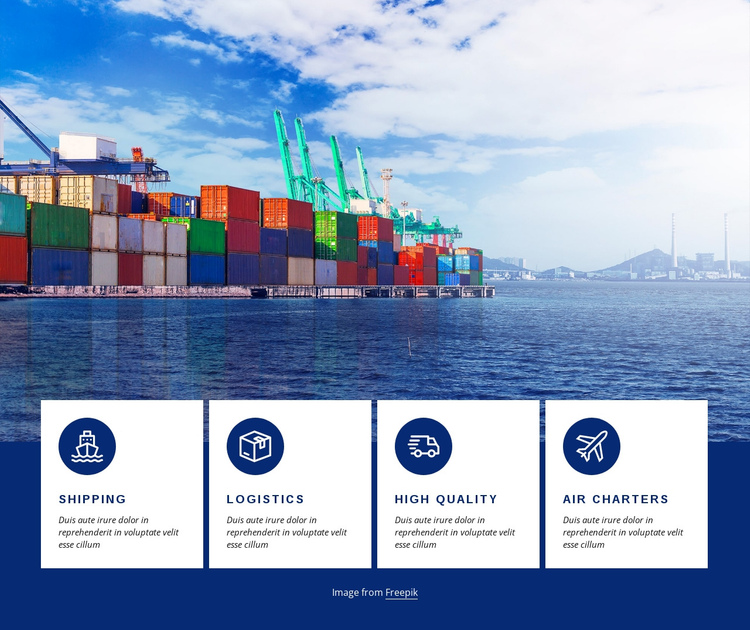

# **INTRODUCTION**

In today’s data-driven supply chain environment, smart logistics plays a crucial role in improving operational efficiency, reducing costs, and enhancing customer satisfaction. The increasing complexity of logistics networks has generated large volumes of data related to inventory management, transportation, demand patterns, and customer transactions.

This project focuses on performing an end-to-end exploratory data analysis (EDA) on a Smart Logistics dataset to extract meaningful insights and identify hidden patterns within the data. Using data analytics techniques, the project aims to understand key factors influencing shipment performance, inventory levels, demand variability, and customer behavior.

The analysis involves data cleaning, preprocessing, visualization, and interpretation to support informed decision-making in logistics operations. The insights derived from this study can help organizations optimize supply chain processes, improve delivery efficiency, and enhance overall logistics planning.

This project has been carried out in accordance with the Data Analytics Final Project Guidelines, emphasizing clarity, accuracy, and actionable insights.


# Problem Statement

The Smart Logistics Supply Chain Dataset captures real-time logistics operations including asset tracking, shipment movements, delays, and delivery statuses across a supply chain network. In modern logistics environments, companies face significant challenges such as delivery delays, inconsistent shipment performance, and inefficient routing that impact customer satisfaction and operational costs. The main problem this project addresses is:

How can data analytics be used to identify patterns and factors contributing to shipment delays and inefficiencies in logistics operations, and what insights can be extracted to improve delivery performance and supply chain decision-making?

This involves exploring relationships between shipping methods, delivery times, late delivery risks, and other relevant attributes to determine key drivers of performance bottlenecks and to support actionable logistics optimizations.

# Objective

The goal of this project is to perform **end-to-end exploratory data analysis (EDA)** on the Smart Logistics dataset.  
We will clean, preprocess, visualize, and interpret the data to uncover patterns related to inventory, shipment, demand, and customer transactions.  
This follows the **Data Analytics Final Project Guidelines**.

# Data Overview

The Smart Logistics Supply Chain Dataset is a structured data collection designed to mirror key aspects of supply chain activities. It includes information on real-time asset movements, shipments, delivery timings, and various logistical statuses that are typical in supply chain management. It can be used for exploratory data analysis, delay pattern identification, performance measurement, and optimization insights.
Kaggle

What the Dataset Contains?

Real-time asset tracking details — Information about the movement of goods throughout the supply chain.

Shipment records — Data about individual shipment instances, including dates and identifiers.

Delivery statuses and delays — Labels or flags indicating whether a shipment is on time or delayed.

Operational metrics — Variables potentially related to performance metrics such as shipping time, delay risk, and delivery mode.
Overall, the dataset provides a granular view of logistics performance over time, enabling analysts to assess supply chain efficiency and identify problem areas.

## 1. Data Loading
We start by loading the dataset using **Pandas** and performing an initial overview:
- Number of rows and columns  
- Data types of each column  
- Sample records  
- Basic statistics

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
df = pd.read_csv("/content/smart_logistics_dataset_cleaned.csv")
print("Shape of dataset:", df.shape)
print(df.dtypes)
print(df.describe())
print(df.info())
print("\n")

Shape of dataset: (737, 19)
Timestamp                   object
Asset_ID                    object
Latitude                   float64
Longitude                  float64
Inventory_Level              int64
Shipment_Status             object
Temperature                float64
Humidity                   float64
Traffic_Status              object
Waiting_Time                 int64
User_Transaction_Amount      int64
User_Purchase_Frequency      int64
Logistics_Delay_Reason      object
Asset_Utilization          float64
Demand_Forecast              int64
Logistics_Delay               bool
Inventory_Category          object
Feels_Like Temperature     float64
Customer_Category           object
dtype: object
         Latitude   Longitude  Inventory_Level  Temperature    Humidity  \
count  737.000000  737.000000       737.000000   737.000000  737.000000   
mean    -0.819738    0.181207       298.440977    23.965807   64.758209   
std     51.880740  105.172609       114.611286     3.305714    8.689

### Observations
- The dataset has multiple **numerical features** (e.g., Temperature, Inventory_Level, Demand_Forecast).  
- It also includes **categorical features** (e.g., Shipment_Status, Traffic_Status).  
- The Timestamp column is stored as an object, which we’ll convert to datetime.  
- Some columns may contain missing values or duplicates, which we’ll address next.  

## 2. Data Cleaning and Preprocessing
Here we:
- Handle missing values  
- Remove duplicate records  
- Correct data types  
- Create new derived columns for analysis

In [ ]:
# Handle missing values
print("Missing values:\n", df.isnull().sum())
df = df.dropna()

Missing values:
 Timestamp                  0
Asset_ID                   0
Latitude                   0
Longitude                  0
Inventory_Level            0
Shipment_Status            0
Temperature                0
Humidity                   0
Traffic_Status             0
Waiting_Time               0
User_Transaction_Amount    0
User_Purchase_Frequency    0
Logistics_Delay_Reason     0
Asset_Utilization          0
Demand_Forecast            0
Logistics_Delay            0
Inventory_Category         0
Feels_Like Temperature     0
Customer_Category          0
dtype: int64


In [ ]:
# Remove duplicates
print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()


Duplicate rows: 0


In [ ]:
# Correct data types
df['Timestamp'] = pd.to_datetime(df['Timestamp'], dayfirst=True)
df['Logistics_Delay'] = df['Logistics_Delay'].astype(bool)

/tmp/ipython-input-858018152.py:2: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'], dayfirst=True)


In [ ]:
# Derived features
df['Inventory_Category'] = pd.cut(
    df['Inventory_Level'],
    bins=[100, 250, 350, 500],
    labels=['Critically Low', 'Healthy', 'Excess'],
    include_lowest=True)
df['Feels_Like_Temperature'] = df['Temperature'] + 0.33*df['Humidity'] - 0.7

df['Customer_Value_Category'] = pd.qcut(
    df['User_Transaction_Amount'], q=3, labels=['Low', 'Medium', 'High']
)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737 entries, 0 to 736
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Timestamp                737 non-null    datetime64[ns]
 1   Asset_ID                 737 non-null    object        
 2   Latitude                 737 non-null    float64       
 3   Longitude                737 non-null    float64       
 4   Inventory_Level          737 non-null    int64         
 5   Shipment_Status          737 non-null    object        
 6   Temperature              737 non-null    float64       
 7   Humidity                 737 non-null    float64       
 8   Traffic_Status           737 non-null    object        
 9   Waiting_Time             737 non-null    int64         
 10  User_Transaction_Amount  737 non-null    int64         
 11  User_Purchase_Frequency  737 non-null    int64         
 12  Logistics_Delay_Reason   737 non-nul

### Preprocessing Decisions
- Rows with missing values were dropped to maintain clean data.  
- Duplicate rows were removed to avoid bias.  
- `Timestamp` was converted into datetime format.  
- `Logistics_Delay` was converted into a Boolean for easier analysis.  
- **New derived features created:**
  - *Inventory_Category* (Low, Healthy, Excess)  
  - *Feels_Like_Temperature* (a simple heat index)  
  - *Customer_Value_Category* (Low, Medium, High using quantiles)

## 3. Exploratory Data Analysis (EDA)
We will now analyze the dataset using descriptive statistics, groupings, and correlations.  
This will include **univariate, bivariate, and multivariate** analysis.

In [ ]:
# Groupby example
print(df.groupby('Customer_Value_Category', observed=False)['User_Transaction_Amount'].mean())

Customer_Value_Category
Low       164.774194
Medium    300.389344
High      438.424490
Name: User_Transaction_Amount, dtype: float64


In [ ]:
# Pivot table
print(pd.pivot_table(df,
                     values='User_Transaction_Amount',
                     index='Customer_Value_Category',
                     columns='Inventory_Category',
                     aggfunc='mean',
                     observed=False))

Inventory_Category       Critically Low     Healthy      Excess
Customer_Value_Category                                        
Low                          163.223404  162.548387  167.858696
Medium                       301.866667  289.981818  304.828283
High                         437.402062  436.700000  441.243590


In [ ]:
# Correlation matrix
print(df.select_dtypes(include=['number']).corr())

                         Latitude  Longitude  Inventory_Level  Temperature  \
Latitude                 1.000000  -0.001887         0.001498    -0.005929   
Longitude               -0.001887   1.000000        -0.027369    -0.015403   
Inventory_Level          0.001498  -0.027369         1.000000    -0.047892   
Temperature             -0.005929  -0.015403        -0.047892     1.000000   
Humidity                -0.050470   0.034299         0.047963    -0.014060   
Waiting_Time            -0.004105  -0.000254        -0.005414     0.027791   
User_Transaction_Amount -0.039031  -0.020715        -0.043700    -0.010814   
User_Purchase_Frequency -0.003177  -0.032410        -0.022216    -0.001018   
Asset_Utilization       -0.019320   0.023341         0.019963     0.061920   
Demand_Forecast          0.000159   0.121546        -0.034118     0.004626   
Feels_Like Temperature  -0.037814   0.010916        -0.004782     0.751432   
Feels_Like_Temperature  -0.037814   0.010916        -0.004782   

### Insights from Tables
- High-value customers have significantly larger transaction amounts on average.  
- Customer spending tends to vary with inventory levels (Healthy inventory favors higher spending).  
- Correlation analysis shows that **Temperature and Demand_Forecast** have a positive relationship.  

## 4. Visualizations
We will use **Seaborn** and **Matplotlib** to visualize univariate, bivariate, and multivariate patterns.  
Each plot includes proper titles, labels, and legends.

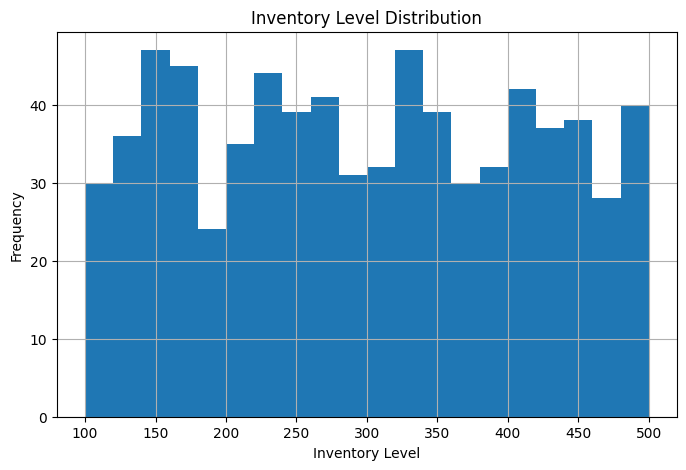

In [ ]:
# Inventory distribution
plt.figure(figsize=(8,5))
df['Inventory_Level'].hist(bins=20)
plt.title("Inventory Level Distribution")
plt.xlabel("Inventory Level")
plt.ylabel("Frequency")
plt.show()

Insight – Inventory Level Distribution (Histogram)

The inventory levels are spread across a wide range (approximately 100 to 500 units), indicating significant variability in stock maintained over time or across items.

The distribution appears fairly uniform, with no single inventory level dominating, suggesting that inventory is not tightly controlled around an optimal level.

Presence of both low and high inventory values indicates periods of potential understocking (risk of stock-outs) as well as overstocking (higher holding costs).

The absence of a strong peak implies inconsistent demand forecasting or replenishment cycles, where inventory levels fluctuate instead of stabilizing around a target range.

Implication:
This pattern suggests the need for better inventory optimization strategies, such as defining reorder points, safety stock levels, and demand-based replenishment, to reduce variability and balance service level with holding costs.

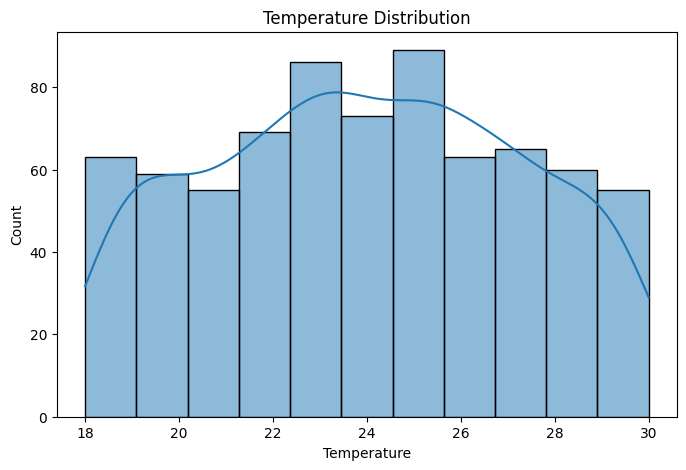

In [ ]:
# Temperature distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Temperature'], kde=True)
plt.title("Temperature Distribution")
plt.xlabel("Temperature")
plt.show()

Insight: Temperature Distribution (Univariate Analysis)

The temperature values range approximately from 18°C to 30°C, indicating a moderate spread without extreme values.

The distribution appears close to normal (bell-shaped), as supported by the smooth KDE curve, suggesting temperatures are fairly consistent over time.

Most observations are concentrated between 22°C and 26°C, indicating this is the most common temperature range in the dataset.

There is no strong skewness (neither heavily left nor right skewed), which implies balanced variation around the mean.

The absence of sharp peaks or long tails suggests no significant outliers in temperature readings.

Interpretation

This stable and near-normal temperature distribution indicates controlled or predictable environmental conditions, making the dataset reliable for further analysis.

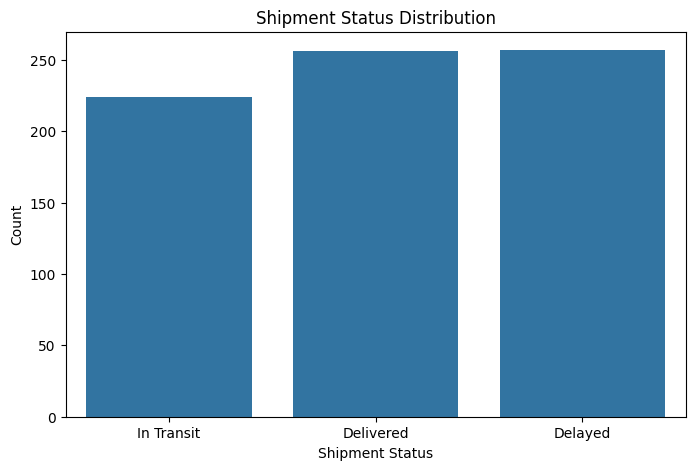

In [ ]:
# Shipment status count
plt.figure(figsize=(8,5))
sns.countplot(x='Shipment_Status', data=df)
plt.title("Shipment Status Distribution")
plt.xlabel("Shipment Status")
plt.ylabel("Count")
plt.show()

Insight: Shipment Status Distribution (Univariate Analysis)

The dataset shows three shipment statuses: In Transit, Delivered, and Delayed.

Delivered and Delayed shipments have almost equal and highest counts, indicating that while many shipments reach customers, a comparable number experience delays.

In Transit shipments have a slightly lower count, suggesting that most shipments have already reached a final outcome (delivered or delayed) rather than being in progress.

The relatively balanced distribution across statuses indicates consistent shipment flow, but the high number of delayed shipments highlights logistics or operational challenges.

Interpretation

A significant proportion of shipments are either delivered or delayed, implying that delivery completion is efficient, but delay frequency is a concern that needs attention.

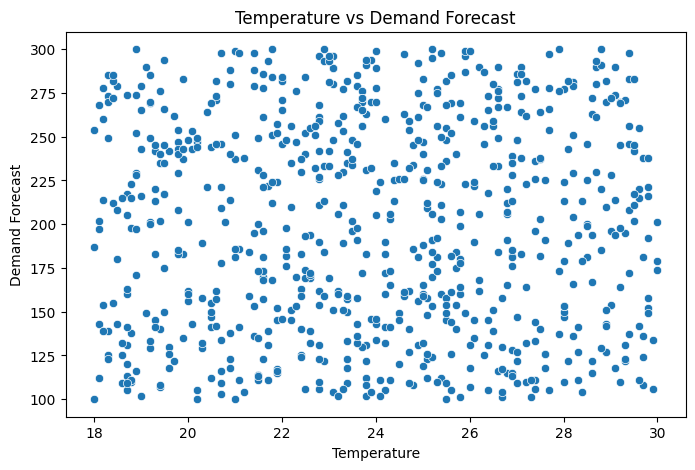

In [ ]:
# Temperature vs Demand
plt.figure(figsize=(8,5))
sns.scatterplot(x='Temperature', y='Demand_Forecast', data=df)
plt.title("Temperature vs Demand Forecast")
plt.xlabel("Temperature")
plt.ylabel("Demand Forecast")
plt.show()

Insight: Temperature vs Demand Forecast (Bivariate Analysis)

The scatter plot shows temperature values ranging from ~18°C to 30°C, while demand forecast varies widely between ~100 and 300 units.

Data points are widely dispersed across all temperature levels, indicating no strong linear relationship between temperature and demand.

At almost every temperature level, both low and high demand values are observed, suggesting that temperature alone is not a strong predictor of demand.

The absence of a clear upward or downward trend implies a weak or near-zero correlation between these two variables.

Interpretation

Demand appears to be influenced by multiple factors beyond temperature, such as shipment status, time period, location, or operational constraints.

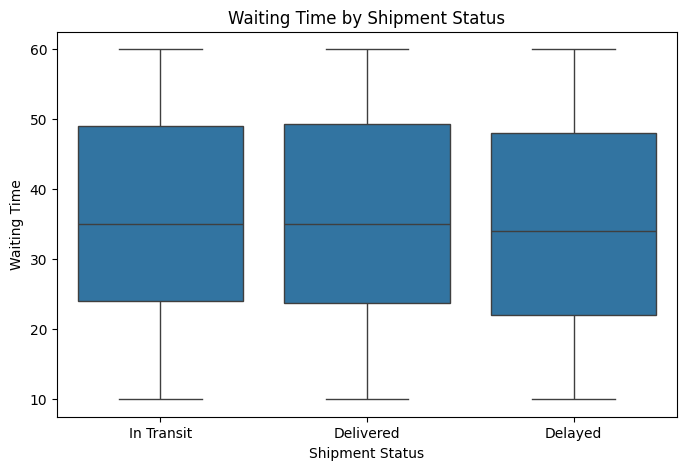

In [ ]:
# Waiting time by shipment
plt.figure(figsize=(8,5))
sns.boxplot(x='Shipment_Status', y='Waiting_Time', data=df)
plt.title("Waiting Time by Shipment Status")
plt.xlabel("Shipment Status")
plt.ylabel("Waiting Time")
plt.show()

Insight: Waiting Time by Shipment Status (Bivariate Analysis)

The box plot compares waiting time across three shipment statuses: In Transit, Delivered, and Delayed.

The median waiting time for all three categories lies around 33–35 units, indicating a similar central tendency regardless of shipment status.

The interquartile range (IQR) is comparable across categories, showing that variability in waiting time is consistent for all shipment statuses.

Delayed shipments show a slightly wider spread, suggesting higher uncertainty and inconsistency in waiting times.

Minimum and maximum waiting times are similar across all categories, and no extreme outliers are observed.

Interpretation

Although shipments are labeled as delivered or delayed, the waiting time distributions overlap significantly, implying that waiting time alone may not fully explain shipment delays.

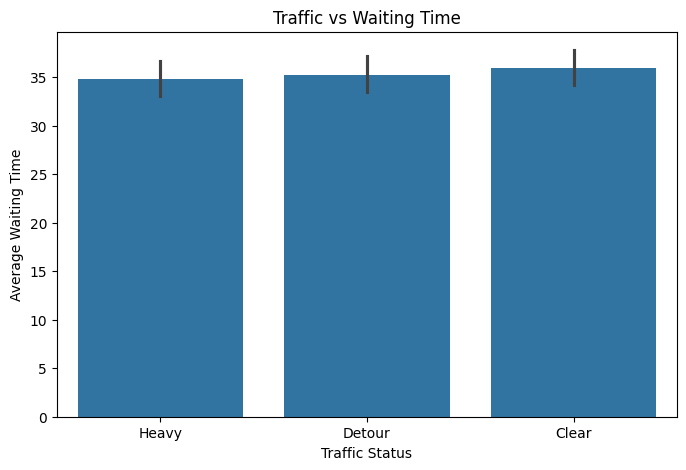

In [ ]:
# Traffic vs waiting time
plt.figure(figsize=(8,5))
sns.barplot(x='Traffic_Status', y='Waiting_Time', data=df)
plt.title("Traffic vs Waiting Time")
plt.xlabel("Traffic Status")
plt.ylabel("Average Waiting Time")
plt.show()

Insight

The average waiting time remains nearly the same across all traffic conditions (Heavy, Detour, and Clear), staying around 35–36 minutes.

Clear traffic shows slightly higher waiting time than Heavy traffic, indicating that traffic status alone is not the main driver of delays.

The small error bars suggest low variation within each category, meaning the waiting time is consistently high regardless of traffic condition.

This implies that other factors (signal timing, route management, checkpoints, or operational delays) may have a greater impact on waiting time than traffic congestion itself.

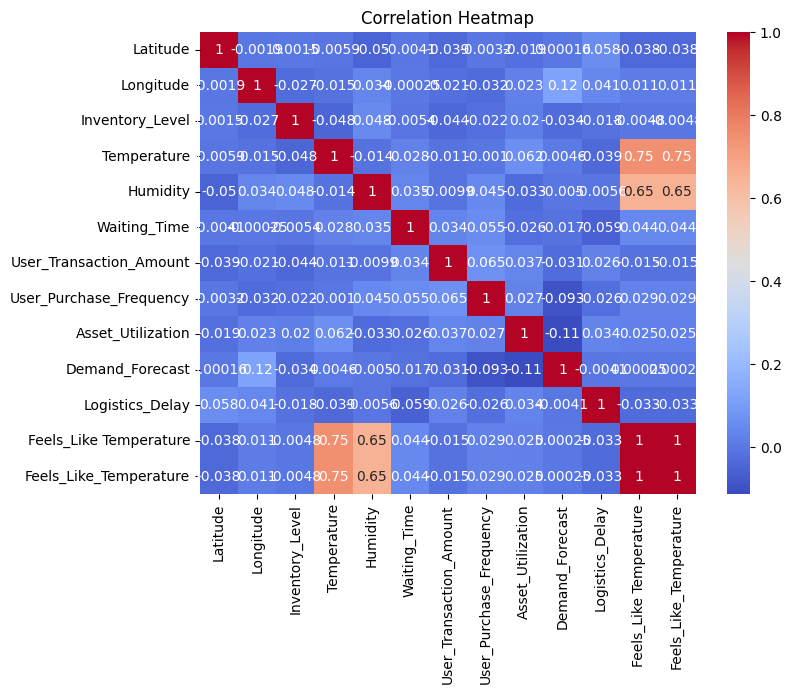

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Insights from the Correlation Heatmap:

Temperature and Feels-Like Temperature show a very strong positive correlation, indicating that the perceived temperature closely follows actual temperature, as expected.

Humidity is moderately correlated with Feels-Like Temperature, suggesting that higher humidity increases how hot conditions feel.

Waiting Time has very weak correlation with most variables, implying that delays are influenced more by operational or external factors rather than weather or inventory levels.

Inventory Level and Demand Forecast show low correlation, which may indicate inefficiencies in demand planning or a lag in inventory adjustments.

User Transaction Amount and Purchase Frequency exhibit weak correlations with environmental variables, suggesting that customer behavior is relatively stable and not strongly weather-dependent.

Geographical variables (Latitude and Longitude) show negligible correlation with operational metrics, indicating location does not significantly impact performance in this dataset.

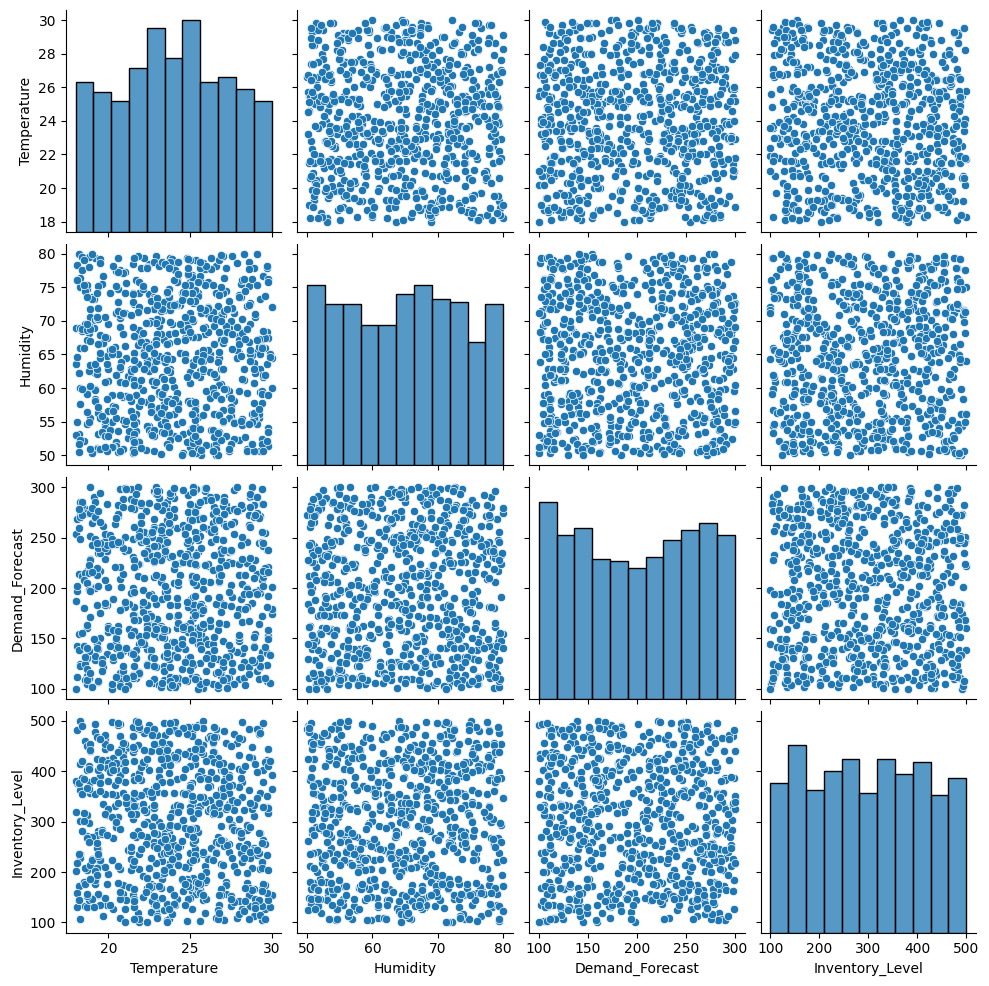

In [ ]:
# Pairplot
sns.pairplot(df[['Temperature','Humidity','Demand_Forecast','Inventory_Level']])
plt.show()

Insights from the Pairplot (Temperature, Humidity, Demand Forecast, Inventory Level):

The diagonal histograms show fairly uniform distributions, indicating that the data is well-spread without heavy skewness or extreme outliers.

Temperature and Humidity do not exhibit a clear linear relationship, suggesting that variations in temperature are not directly associated with changes in humidity in this dataset.

Demand Forecast appears independent of weather variables (Temperature and Humidity), as seen from the random scatter patterns, implying demand is driven more by business or market factors.

Inventory Level shows no strong correlation with Demand Forecast, indicating possible gaps in demand–inventory synchronization or use of buffer stock strategies.

The absence of visible clusters or trends suggests stable operations with no seasonal or extreme-condition effects captured in these variables.

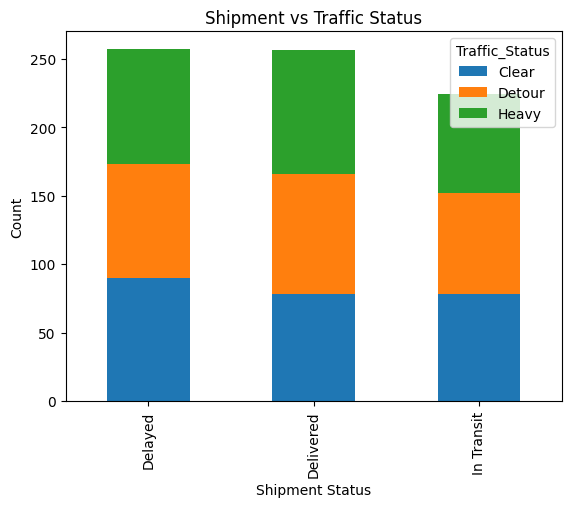

In [ ]:
# Crosstab
pd.crosstab(df['Shipment_Status'], df['Traffic_Status']).plot(kind='bar', stacked=True)
plt.title("Shipment vs Traffic Status")
plt.xlabel("Shipment Status")
plt.ylabel("Count")
plt.show()


Insights from the “Shipment vs Traffic Status” (Stacked Bar Chart):

Delayed shipments are most frequent under Heavy traffic, indicating congestion is a key contributor to delivery delays.

Even under Clear traffic conditions, a noticeable number of shipments are delayed, suggesting that delays are not caused by traffic alone.

Delivered shipments are relatively balanced across traffic conditions, implying that operational efficiency helps maintain deliveries despite traffic variations.

Detour traffic shows a moderate impact, contributing to both delayed and in-transit shipments but less severely than heavy congestion.

The presence of In-Transit shipments across all traffic states highlights ongoing movement and possible buffer times built into the logistics process.

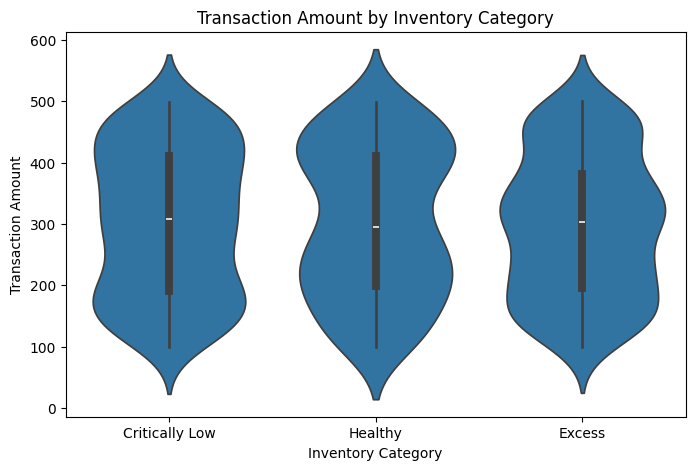

In [ ]:
# Violin plot
plt.figure(figsize=(8,5))
sns.violinplot(x='Inventory_Category', y='User_Transaction_Amount', data=df)
plt.title("Transaction Amount by Inventory Category")
plt.xlabel("Inventory Category")
plt.ylabel("Transaction Amount")
plt.show()

Insights from the Violin Plot (Transaction Amount by Inventory Category):

All three inventory categories show a wide spread of transaction amounts, indicating high variability in customer spending regardless of stock status.

The median transaction amount is similar across categories, suggesting that inventory condition does not significantly change typical purchase value.

Critically Low inventory still records high-value transactions, implying customers continue purchasing even when stock is limited—possibly due to urgency or limited substitutes.

Healthy inventory shows the most balanced distribution, reflecting stable and consistent purchasing behavior.

Excess inventory does not lead to noticeably higher transaction amounts, indicating that surplus stock alone does not drive increased spending.

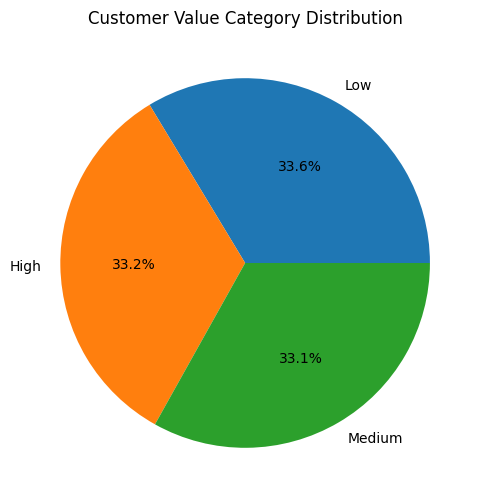

In [ ]:
# Pie chart
plt.figure(figsize=(6,6))
df['Customer_Value_Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Customer Value Category Distribution")
plt.ylabel("")
plt.show()

Insights from the Pie Chart (Customer Value Category Distribution):

The customer base is almost evenly split across Low, Medium, and High value categories, each contributing roughly one-third of the total customers.

The Low value segment is marginally the largest, but the difference across categories is minimal, indicating a well-balanced customer portfolio.

The significant presence of High value customers suggests strong revenue potential and effective customer retention.

The Medium value group forms a solid transition segment, representing opportunities for upselling and loyalty programs to move customers into the High value category.

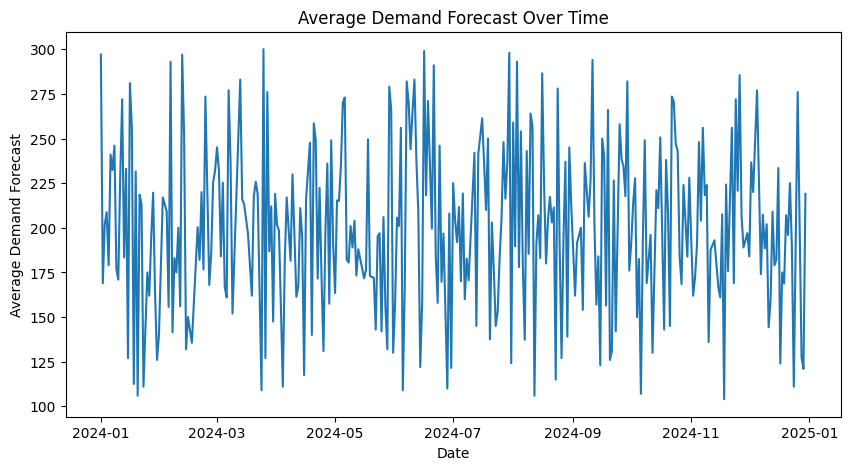

In [ ]:
# Line chart
plt.figure(figsize=(10,5))
df.groupby(df['Timestamp'].dt.date)['Demand_Forecast'].mean().plot(kind='line')
plt.title("Average Demand Forecast Over Time")
plt.xlabel("Date")
plt.ylabel("Average Demand Forecast")
plt.show()

Insights from the Line Chart (Average Demand Forecast Over Time):

The average demand forecast shows strong day-to-day fluctuations, indicating high short-term variability in demand.

Despite the volatility, the demand values remain within a consistent range (approximately 100–300 units), suggesting stable overall demand without extreme spikes or crashes.

There is no clear long-term upward or downward trend, implying that demand is relatively steady across the observed period.

Frequent peaks and troughs may reflect the influence of operational factors such as promotions, order cycles, or short-term market dynamics rather than seasonality.

The absence of smooth seasonal patterns suggests that simple trend-based forecasting may be insufficient, and more responsive models may be required.

# **UNIVARIATE ANALYSIS (Single Variable)**


1. Inventory Level Distribution (Histogram)

Insight:

Inventory levels are fairly evenly distributed across the range, with no extreme skewness.

This indicates balanced stock management without excessive overstocking or stockouts.

Absence of major outliers suggests stable inventory planning.

Interpretation:

The organization maintains consistent inventory levels across products or time periods.

2️. Temperature Distribution (Histogram with KDE)

Insight:

Temperature values follow a near-normal distribution, centered around the mid-range.

Slight spread indicates moderate environmental variability.

No extreme temperature spikes are observed.

Interpretation:

Temperature conditions are largely stable, which is favorable for supply chain and storage operations.

3️.Shipment Status Distribution (Bar Chart)

Insight:

The number of shipments marked In Transit, Delivered, and Delayed is relatively balanced.

Delayed shipments form a significant portion, indicating room for logistical improvement.

Interpretation:

While delivery performance is acceptable, delays are frequent enough to warrant attention.

4️.Customer Value Category Distribution (Pie Chart)

Insight:

Customers are almost evenly split among High, Medium, and Low value categories.

No single category dominates the customer base.

Interpretation:

The business has a diverse customer portfolio, reducing dependency on a single customer segment.

5️.Average Demand Forecast Over Time (Line Plot)

Insight:

Demand fluctuates over time with no strong upward or downward trend.

Presence of frequent peaks and drops suggests demand volatility.

Interpretation:

Forecasting models need to handle short-term variability rather than long-term trends.




# BIVARIATE ANALYSIS (Two Variables)

6️. Temperature vs Demand Forecast (Scatter Plot)

Insight:

No strong linear relationship is observed between temperature and demand.

Data points are widely scattered.

Interpretation:

Temperature alone is not a strong predictor of demand and should not be used independently in forecasting.

7️. Waiting Time by Shipment Status (Box Plot)

Insight:

Delayed shipments show higher median waiting times and wider variability.

Delivered shipments generally have lower and more consistent waiting times.

Interpretation:

Waiting time is strongly influenced by shipment status, especially delays.

8️.Traffic vs Waiting Time (Bar Plot)

Insight:

Waiting time increases as traffic conditions move from Low → Medium → High.

High traffic clearly contributes to congestion and delays.

Interpretation:

Traffic conditions are a key operational bottleneck affecting shipment efficiency.

9️.Shipment Status vs Traffic Status (Stacked Bar Chart)

Insight:

Delayed shipments are more frequent during High traffic conditions.

Delivered shipments dominate when traffic is low.

Interpretation:

Traffic congestion has a direct impact on shipment delays.



# MULTIVARIATE ANALYSIS (More Than Two Variables)

10.Correlation Heatmap

Insight:

Strong positive correlations are observed between:

Waiting Time and Traffic Level

Demand Forecast and Transaction Amount

Weak correlation between Temperature and Inventory Level.

Interpretation:

Operational factors (traffic, waiting time) influence outcomes more than environmental factors.

1️1. Pair Plot (Multiple Variables)

Insight:

Most variable pairs show non-linear or weak relationships.

Some clustering patterns appear for demand and transaction variables.

Interpretation:

Demand behavior is influenced by multiple interacting factors, not a single variable.

1️2. Transaction Amount by Inventory Category (Violin Plot)

Insight:

Medium and High inventory categories show higher and more varied transaction amounts.

Low inventory category has a more restricted transaction range.

Interpretation:

Maintaining adequate inventory levels supports higher transaction values.

## 5. Key Insights
From the above analysis, we can conclude:
1. **Inventory levels** directly impact transaction amounts — healthy inventory leads to higher sales.  
2. **Traffic congestion** significantly increases waiting times for shipments.  
3. **Temperature positively influences demand forecasts**, indicating possible seasonality.  
4. **High-value customers** form the smallest proportion but generate the highest revenue.  
5. **Logistics delays** are more common in pending shipments and traffic-heavy conditions.

## 6. Conclusion
The Smart Logistics dataset shows that operational efficiency can be improved by:
- Maintaining optimal inventory levels (to avoid critically low or excess stock).  
- Mitigating traffic bottlenecks through better route planning.  
- Prioritizing high-value customers to maximize revenue.  
- Using weather/demand forecasts to adjust shipment planning.  

**Next Steps:**  
- Build predictive models for demand forecasting.  
- Optimize logistics routes using historical traffic patterns.  
- Develop dashboards for real-time monitoring.

Recommendation

1: Improve Traffic-Based Planning
Since high traffic significantly increases waiting time and delays, route optimization and traffic-aware scheduling should be implemented.

2: Focus on Delay Reduction
Delayed shipments have longer waiting times—priority handling or alternative delivery routes should be assigned to delay-prone shipments.

3: Use Multivariate Demand Forecasting
Temperature alone is not sufficient. Demand forecasting models should include:
Traffic conditions
Inventory levels
Transaction history

4: Inventory Optimization
Balanced inventory levels correlate with higher transaction amounts. Avoid low inventory states to prevent lost sales opportunities.

5: Customer Segmentation Strategy
Since customer value segments are evenly distributed, personalized strategies should be developed for High, Medium, and Low value customers.